# Redes Neurais Artificiais: Projeto Prático 2
Aprendizado Supervisionado com Neurônio Perceptron


**Integrantes:**

- **Leonardo Monteiro Neres de Lima** - 1615080320
- **Thatielen Oliveira Pereira** - 1515080618
- **Vyctor Lima Negreiros** - 1615080372

## Preparação Inicial

### Bibiotecas Utilizadas

In [47]:
import math, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, random

### Definindo Precisão de Quatro Casas Decimais

In [48]:
np.set_printoptions(precision=4)

### Funções Auxiliares

In [49]:
def separar_saidas(registros):
    saida = []
    
    for registro in registros:
        saida.append(registro[2])
    
    return np.array(saida, dtype=int)

def separar_entradas(registros):
    entrada = []
    
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    
    return np.array(entrada, dtype=float)

def criar_cores(saidas):
    cores, mapa_cores = [], {0: 'red', 1: 'blue'}
    
    for saida in saidas:
        cores.append(mapa_cores[saida])

    return cores

def aleatoriza(entradas, saidas):
    entrada_aleatoria, saida_aleatoria, tam = np.array([]), np.array([]), len(entradas)
    
    for i in range(tam): 
        index = random.randint(0, len(entradas) - 1)

        entrada_aleatoria = np.append(entrada_aleatoria, entradas[index])
        saida_aleatoria = np.append(saida_aleatoria, saidas[index])

        entradas = np.delete(entradas, index, 0)
        saidas = np.delete(saidas, index, 0)

    entrada_aleatoria = entrada_aleatoria.reshape(entrada_aleatoria.size // 3, 3)
    
    return (entrada_aleatoria, saida_aleatoria)

def acuracia(vp, vn, fp, fn):
    return (vp + vn) / (vp + vn + fp + fn)

def precisao(vp, vn, fp, fn):
    return vp / (vp + fp)

def revocacao(vp, vn, fp, fn):
    return vp / (vp + fn)

def f1(vp, vn, fp, fn):
    r = revocacao(vp, vn, fp, fn)
    p = precisao(vp, vn, fp, fn)
    
    return 2 * (r * p) / (r + p) 

### Implementação do Perceptron

In [50]:
class Perceptron:
    # Instanciação do objeto Perceptron de acordo com parâmetros
    def __init__(self, teta, taxa_aprendizagem, pesos):
        self.teta = teta
        self.taxa_aprendizagem = taxa_aprendizagem
        self.pesos = pesos
        
    # Função de ativação degrau
    def funcao_ativacao(self, soma):
        if (soma >= self.teta):
            return 1
        return 0

    # Função que realiza o produto escalar de um regitro com os pesos
    def calculo_saida(self, registro):
        soma = registro.dot(self.pesos)
        return self.funcao_ativacao(soma)

    # Função de treinamento que é executada até que não haja erro ou limite de iterações caso fornecido
    def treinamento(self, entradas, saidas, max_epocas = 0, aleatorio = False):
        # Aleatorização das entradas
        if aleatorio:
            entradas, saidas = aleatoriza(entradas, saidas)
        
        # Inicialização de variáveis
        epocas, ajustes_por_epoca, saidas_treinamento = 1, [], np.array([], dtype=int)
        
        # Exibição inicial dos pesos
        print("Pesos Início da Época %d:" % epocas, self.pesos)
        print()

        # Loop que garante a execução até que não haja erro
        while (np.array_equal(saidas, saidas_treinamento) == False and (epocas < max_epocas or max_epocas == 0)):
            ajustes_pesos, saidas_treinamento = 0, np.array([], dtype=int)
            
            # Loop para percorrer todas as entradas/saídas
            for i in range(0, len(entradas), 1):
                alterou_pesos = False
                
                # Cálculo da saída para a entrada atual aplicando-se os pesos
                saida_calculada = self.calculo_saida(np.asarray(entradas[i]))
                
                # Cálculo do erro da saída
                erro = saidas[i] - saida_calculada
                # Salvamento da saída
                
                saidas_treinamento = np.append(saidas_treinamento, saida_calculada)
                # Loop para atualização do vetor de pesos
                
                for j in range(0, len(self.pesos)):
                    # Cálculo do novo peso
                    aux = self.pesos[j] + (self.taxa_aprendizagem * entradas[i][j] * erro)
                    
                    # Contagem de ajustes dos pesos da época caso haja mudança de valor
                    if(aux != self.pesos[j]):
                        ajustes_pesos += 1
                        alterou_pesos = True
                    
                    self.pesos[j] = aux
                
                # Exibe os pesos casa haja alteração
                if(alterou_pesos == True):
                    print("Novos Pesos:", self.pesos)
            
            # Exibe o número de ajustes de pesos da época
            print()
            print("%d ajustes no vetor de pesos na época %d" % (ajustes_pesos, epocas))
            print()
            
            # Guarda o total de ajustes por época
            ajustes_por_epoca.append(ajustes_pesos)
            epocas += 1

        return epocas, ajustes_por_epoca
    
    # Função para predição de valores
    def predicao(self, registros):
        y_previsto = []
        
        for i in range(len(registros)):
            y_previsto.append(self.calculo_saida(np.asarray(registros[i])))
        
        return y_previsto
    
    # Função para retorno da matriz de confusão
    def matriz_confusao(self, previsto, real):
        vp, vn, fp, fn = 0, 0, 0, 0
        
        for i in range(len(real)):
            if (real[i] == 0):
                if (previsto[i] == 0):
                    vn += 1
                else:
                    fn += 1
            else:
                if (previsto[i] == 1):
                    vp += 1
                else:
                    fp += 1
                    
        return [[vp, fp], [fn, vn]], (vp, vn, fp, fn)

## Parte I – Resolvendo um Problema Linearmente Separável

### Leitura do arquivo `dataAll.txt`

In [51]:
data = np.fromfile(os.path.join('datasets', 'dataAll.txt'), dtype=float)
print(data.shape)

(3000,)


### Redimensionamento do Array

In [52]:
registros = data.reshape(data.size//3, 3)
print(registros.shape)

(1000, 3)


### Preparação dos Arrays de Entradas e Saídas

In [53]:
X = separar_entradas(registros)
print(X.shape)

Y = separar_saidas(registros)
print(Y.shape)

(1000, 3)
(1000,)


## 1. As equipes devem utilizar a função de ativação degrau com θ = 0;

In [54]:
teta = 0

## 2. O valor da taxa de aprendizado deve ser igual a η = 0,1;

In [55]:
taxa_aprendizagem = 0.1

## 3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo;

In [56]:
pesos_iniciais = np.random.uniform(-0.5, 0.5, X.shape[1])

### Instanciação do Perceptron

In [57]:
perceptron1 = Perceptron(teta=teta, taxa_aprendizagem=taxa_aprendizagem, pesos=pesos_iniciais)
print(perceptron1.pesos)

[ 0.3025  0.3546 -0.0822]


## 4. A cada época deve ser indicado o número de ajustes feitos no vetor de pesos;
## 5. Sempre que o vetor de pesos for ajustado, este deve ser impresso;
## 6. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os exemplos presentes no conjunto de treinamento;

### Treinamento do Neurônio

In [58]:
epocas, ajustes_por_epoca = perceptron1.treinamento(X, Y)

Pesos Início da Época 1: [ 0.3025  0.3546 -0.0822]

Novos Pesos: [  0.4025 -53.3045 -76.5779]
Novos Pesos: [  0.3025  19.4916 -40.7484]
Novos Pesos: [  0.2025 102.0903  39.1074]
Novos Pesos: [  0.3025 107.936  -39.1871]
Novos Pesos: [   0.4025   67.9271 -117.0798]
Novos Pesos: [  0.5025 126.37   -75.4996]
Novos Pesos: [   0.4025   73.41   -132.369 ]
Novos Pesos: [  0.5025 132.9695 -82.2467]
Novos Pesos: [   0.4025   87.4449 -147.8826]
Novos Pesos: [   0.5025  101.7833 -138.4964]
Novos Pesos: [  0.6025 192.4991 -63.7831]
Novos Pesos: [   0.5025  134.7182 -124.0912]
Novos Pesos: [   0.4025   84.8083 -175.3517]
Novos Pesos: [   0.3025  112.6321 -157.2967]
Novos Pesos: [   0.2025  140.0957 -136.4404]
Novos Pesos: [ 1.0246e-01  7.1240e+01 -2.0651e+02]
Novos Pesos: [   0.2025  102.6904 -182.0793]
Novos Pesos: [ 1.0246e-01  1.6559e+02 -1.2389e+02]
Novos Pesos: [   0.2025  116.4705 -175.7412]
Novos Pesos: [ 1.0246e-01  1.8295e+02 -1.2374e+02]
Novos Pesos: [   0.2025  129.7964 -197.6513]
Novos 

## 7. Ao final, deve-se imprimir:

## a) O número total de ajustes no vetor de pesos;

In [59]:
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de ajustes de pesos: 177


## b) O número de épocas até a convergência;

In [60]:
print("Total de Épocas:", epocas)

Total de Épocas: 4


## c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

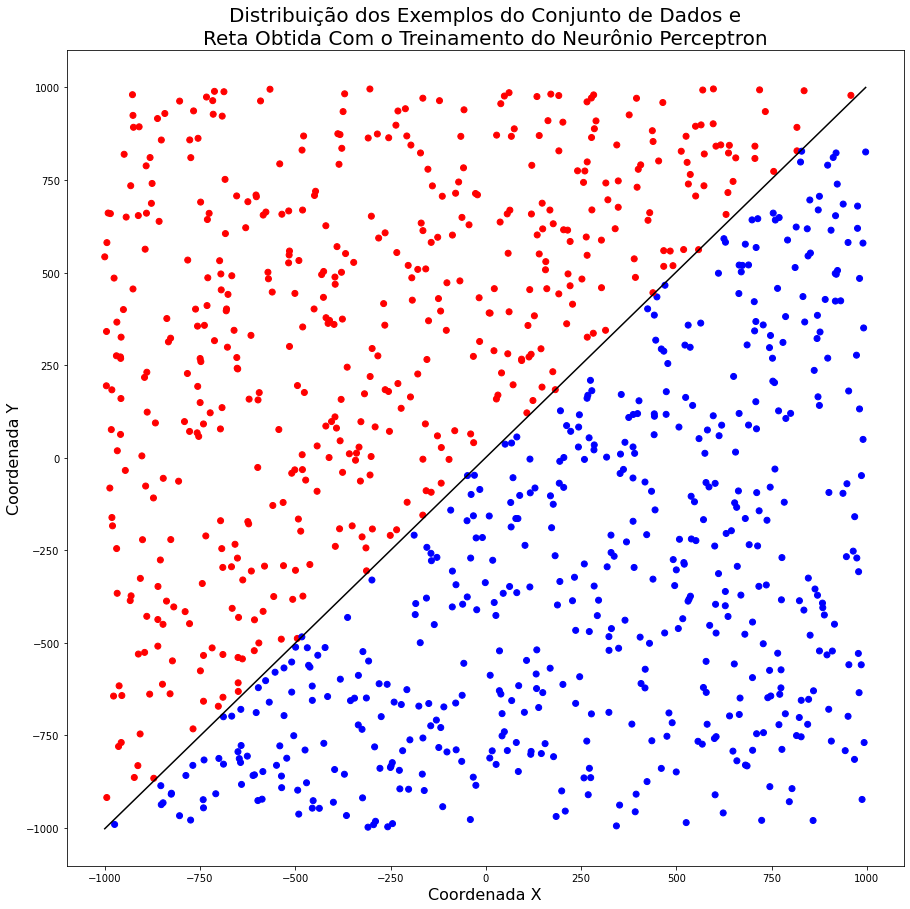

In [61]:
plt.rcParams['figure.figsize'] = (15, 15)

# Cálculo dos coeficientes da linha de decisão
a, b = perceptron1.pesos[0] / perceptron1.pesos[2], (-1) * (perceptron1.pesos[1] / perceptron1.pesos[2])

cores = criar_cores(Y)

# Criando os pontos da linha de decisão para treino
x, y = [], []
menor, maior = min(X[:,1]), max(X[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b * (i)
    y.append(valor)

# Criação do gráfico para treino    
plt.plot(x, y, color="black", markersize=100)
plt.title("Distribuição dos Exemplos do Conjunto de Dados e\nReta Obtida Com o Treinamento do Neurônio Perceptron", size=20)
plt.xlabel("Coordenada X", size=16)
plt.ylabel("Coordenada Y", size=16)
plt.scatter(X[:,1], X[:,2], marker='o', color=cores)
plt.show()

## Parte II – Experimentação

### Parâmetros Necessários

In [62]:
# Teta
teta = 0

# vies
vies = -1

# taxa de aprendizado
n = [.4, .1, .01]

# modulo para gerar o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos
intervalo = [100, 1, .5]

### Produto cartesiano para gerar uma lista de Configurações

In [63]:
index = pd.MultiIndex.from_product([n, intervalo], names = ["n", "intervalo"])

config = pd.DataFrame(index = index).reset_index()

### Funções para capturar e imprimir as configurações

In [64]:
# retorna uma lista com os parametros da configuração
def get_conf(n, i):
    return [n, -i, i]
    
# imprime a configuração
def print_conf(n, i_i, i_s):
    print('Taxa de aprendizado: '+ str(n)+'\nIntervalo utilizado para a distribuição uniforme do valor dos pesos: ('+ str(i_i) +', '+ str(i_s) +')')

### Leitura e configuração do Dataset

In [65]:
# leitura do dataset
data = np.fromfile(os.path.join('datasets', 'data2.txt'), dtype=float)
print(data.shape)


# Função para configurar entrada e saída para o treinamento do perceptron
def get_entradas_e_saidas(data):
    i = 0
    entradas = []
    saidas = []
    while(i < len(data)):
        entradas.append([vies, data[i], data[i+1]])
        saidas.append(data[i+2])
        i = i + 3
    return np.array(entradas, dtype=float), np.array(saidas, dtype=int)

entradas, saidas = get_entradas_e_saidas(data)

(1800,)


## Funções Auxiliares

 Para o cumprimento da atividade é necessário uma distribuição uniforme de valores aleatórios para inicialização dos pesos para a execução do treinamento, a exibição de um gráfico para ilustrar as classes do dataset e o aprendizado representado por uma reta, e também a média e desvio padrão de quantidade ajustes e épocas das 100 execuções de treinamento de cada configuração de treinamento.

In [ ]:
# geração de um número aleatório dentro de um intervalo
def random_interval(i, s):
    min = i
    max = s
    return min + (random() * (max - min))

# geração de uma lista de pesos segundo uma distribuição uniforme de valores aleatórios dado o intervalo
def get_pesos(i, s):
    # seed(1)
    return np.random.uniform(i, s, entradas.shape[1])


In [ ]:
# acumulador de quandidate em lista de lista para lista
def accumulator_to_list(l):
    list_accumulator = []
    for i in l:
        x = 0
        for j in i:
            x = x + j
        list_accumulator.append(x)
    return list_accumulator

# acumulador de quandidate em lista de lista para lista
def accumulator_to_value(l):
    x = 0
    for i in l:
        x = x + i
    return x

# execução de n execuções de treinamento e impressão da média e desvio padrão de quantidade ajustes e épocas
def executions_conf(interval_i, interval_s, n, n_executions, teta):
    v_pesos = []
    v_epocas = []
    v_ajustes = []
    for i in range(n_executions):
        init_pesos = get_pesos(interval_i, interval_s)
        pesos, epocas, ajustes, s = perceptron.treinamento(entradas, saidas, init_pesos, n, teta)
        v_pesos.append(pesos)
        v_epocas.append(epocas)
        v_ajustes.append(ajustes)
    pesos = np.array(v_pesos)
    epocas = np.array(v_epocas)
    ajustes = np.array(accumulator_to_list(v_ajustes))
    
    print(str(n_executions)+' execucoes para a configuracao')
    print('-'*30+'Quantidade de Ajustes de Pesos'+30*'-')
    print('Media: ' + str(np.average(ajustes)))
    print('Desvio Padrao: ' + str(np.std(ajustes)))
    print('-'*35+'Quantidade de Epocas'+35*'-')
    print('Media: ' + str(np.average(epocas)))
    print('Desvio Padrao: ' + str(np.std(epocas)))

    return accumulator_to_value(ajustes), accumulator_to_value(epocas)

In [ ]:
# exibição de um gráfico para ilustrar as classes do dataset e o aprendizado representado por uma reta
def gera_grafico(entradas, saidas, interval_i, interval_s, n, teta):
    # declaracao dos vetores para o grafico
    class_1_x = []
    class_1_y = []
    class_2_x = []
    class_2_y = []
    # separacao de classes por cor
    for i in range(len(entradas)):
        if (saidas[i]==1):
            class_1_x.append(entradas[i][1])
            class_1_y.append(entradas[i][2])
        else:
            class_2_x.append(entradas[i][1])
            class_2_y.append(entradas[i][2])

    # treinamento
    init_pesos = get_pesos(interval_i, interval_s)
    pesos, epocas, ajustes, s = perceptron.treinamento(entradas, saidas, init_pesos, n, teta)
    
    # Cálculo dos coeficientes da linha de decisão
    b = pesos[0]/pesos[2]
    a = -1 * (pesos[1]/pesos[2])
    # Criando os pontos da linha de decisão
    x, y = [], []
    
    menor = min(entradas[:,1])
    maior = max(entradas[:,1])

    for i in [menor, maior]:
        x.append(i)
        valor = b + a*(i)
        y.append(valor)

    
    plt.rcParams['figure.figsize']=(11,11)
    plt.scatter(class_1_x, class_1_y, color='red')
    plt.plot(x, y, color="black", markersize=100)
    plt.scatter(class_2_x, class_2_y, color='blue')
    plt.show()

## Função de iteração da lista de configurações 

A chamada da exibição de um gráfico e 100 execuções de treinamento de cada configuração.

In [ ]:
# itera pela lista capturando e imprimindo o produto cartesiano de configuracoes
conf_result = []
for i in range(len(config['n'])):

    print('\n'+'_'*38+'Configuração ' + str(i+1)+'_'*38+'\n')
    y = get_conf(config['n'][i], config['intervalo'][i])
    print_conf(y[0],y[1],y[2])
    print()

    gera_grafico(entradas, saidas, y[1], y[2], y[0], teta)
    print()

    ajustes, epocas = executions_conf(y[1], y[2], y[0], 100, teta)
    conf_result.append([y[1], y[2], y[0], ajustes, epocas])
    print()


## Análise das configurações 

Para a experimentação é importante analizar os parâmetros resultantes do treinamento baseado na quantidade de execuções en função dos parâmetros das configurações adotadas. 

In [ ]:
# funcao para exibir grafico
def chart_line(x, y, x_label, y_label):
    plt.rcParams['figure.figsize']=(11,11)
    plt.plot(x, y, color="black", markersize=100)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# funcao para configurar o grafico de acordo com a configuracao e o resultado do treinamento
def group_by_config(m, y, x, x_label, y_label):
    m_label = np.unique(m[:,y])
    m_result = np.full((1, len(m_label)), 0)[0]
    for i in m:
        index = np.where(m_label == i[y])[0][0]
        m_result[index] = m_result[index] + i[x]
    chart_line(m_label, m_result, x_label, y_label)

conf_result = np.array(conf_result)

### Quantidade total de Ajustes em função do Módulo do intervalo utilizado para a distribuição uniforme do valor aleatórios para os pesos iniciais

Neste gráfico observamos que quanto maior o intervalo dos valores iniciais de pesos maior é a quantidade de ajustes

In [ ]:
group_by_config(conf_result, 1, 3, 'Módulo do intervalo utilizado para a distribuição uniforme do valor aleatórios para os pesos iniciais', 'Quantidade total de ajustes')

### Quantidade total de Épocas em função da Taxa de aprendizado

Neste gráfico observamos que quanto maior a taxa de aprendizado menor é a quantidade de ajustes

In [ ]:
group_by_config(conf_result, 2, 3, 'Taxa de aprendizado', 'Quantidade total de ajustes')

### Quantidade total de Épocas em função do Módulo do intervalo utilizado para a distribuição uniforme do valor aleatórios para os pesos iniciais

Neste gráfico observamos que quanto maior o intervalo dos valores iniciais de pesos maior é a quantidade de épocas

In [ ]:
group_by_config(conf_result, 1, 4, 'Módulo do intervalo utilizado para a distribuição uniforme do valor aleatórios para os pesos iniciais', 'Quantidade total de épocas')

### Quantidade total de Épocas em função do Módulo da Taxa de aprendizado

Neste gráfico observamos que quanto maior a taxa de aprendizado menor é a quantidade de épocas

In [ ]:
group_by_config(conf_result, 2, 4, 'Taxa de aprendizado', 'Quantidade total de épocas')

Aqui verificamos as configurações que tem menor e maior quantidade de ajustes e épocas

In [ ]:
m = np.where(conf_result[:,3] == min(conf_result[:,3]))[0][0]
print("\n- A configuração que teve menor quantidade de ajustes foi: \n")
print_conf(conf_result[m][2], conf_result[m][0], conf_result[m][1])

m = np.where(conf_result[:,3] == max(conf_result[:,3]))[0][0]
print("\n\n- A configuração que teve maior quantidade de ajustes foi: \n")
print_conf(conf_result[m][2], conf_result[m][0], conf_result[m][1])

m = np.where(conf_result[:,4] == min(conf_result[:,4]))[0][0]
print("\n- A configuração que teve menor quantidade de epocas foi: \n")
print_conf(conf_result[m][2], conf_result[m][0], conf_result[m][1])

m = np.where(conf_result[:,4] == max(conf_result[:,4]))[0][0]
print("\n\n- A configuração que teve maior quantidade de epocas foi: \n")
print_conf(conf_result[m][2], conf_result[m][0], conf_result[m][1])

## Parte III – Validação _Holdout_ em Problema Não-Linearmente Separável

### Leitura do arquivo `dataHoldout.txt`

In [16]:
data = np.fromfile(os.path.join('datasets', 'dataHoldout.txt'), dtype=float)
print(data.shape)

(2400,)


### Redimensionamento do Array

In [17]:
registros = data.reshape(data.size // 3, 3)
print(registros.shape)

(800, 3)


### Preparação dos Arrays de Entradas e Saídas

In [18]:
X = separar_entradas(registros)
print(X.shape)

Y = separar_saidas(registros)
print(Y.shape)

(800, 3)
(800,)


### Gráfico da Distribuição dos Dados

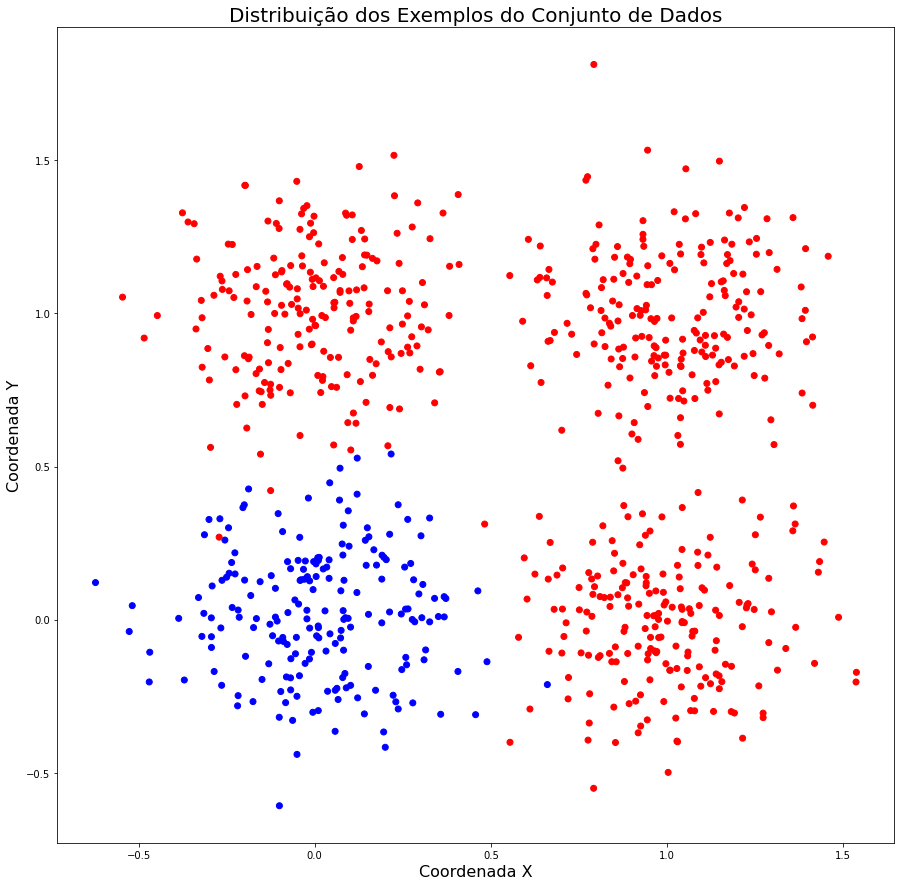

In [33]:
cores = criar_cores(Y)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title("Distribuição dos Exemplos do Conjunto de Dados", size=20)
plt.xlabel("Coordenada X", size=16)
plt.ylabel("Coordenada Y", size=16)
plt.scatter(X[:,1], X[:,2], marker='o', color=cores)
plt.show()

**Desta forma, é possível observar que apenas uma reta não é capaz de separar todos os exemplos do conjunto de dados, sem que exemplos com diferentes rótulos se misturem, sendo abordado melhor a seguir.**

### Randomização dos Dados

In [20]:
X, Y = aleatoriza(X, Y)

**Antes da aplicação do _Holdout_, os dados são aleatorizados de modo minimizar um possível superajuste durante a etapa de treinamento. Vale ressaltar-se que durante o treinamento, a partição destinada a treino, será aleatorizada novamente a cada época, conforme será observado a frente.** 

### Aplicação do _Holdout_

In [21]:
lim = int(len(X) * 0.7)

X_treino, Y_treino, X_teste, Y_teste = X[:lim], Y[:lim], X[lim:], Y[lim:]
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(560, 3) (240, 3) (560,) (240,)


### Parâmetros do Neurônio

In [22]:
teta, taxa_aprendizagem, pesos_iniciais = 0, 0.1, np.random.uniform(-0.5, 0.5, X_treino.shape[1])

### Instanciação do Perceptron

In [23]:
perceptron3 = Perceptron(teta=0, taxa_aprendizagem=0.1, pesos=pesos_iniciais)
print(perceptron3.pesos)

[ 0.4733 -0.336   0.1819]


### Treinamento do Neurônio

In [24]:
epocas, ajustes_por_epoca = perceptron3.treinamento(X_treino, Y_treino, max_epocas=100, aleatorio=True)

Pesos Início da Época 1: [ 0.4733 -0.336   0.1819]

Novos Pesos: [ 0.3733 -0.3487  0.1804]
Novos Pesos: [ 0.2733 -0.3686  0.1934]
Novos Pesos: [ 0.1733 -0.3683  0.2075]
Novos Pesos: [ 0.0733 -0.39    0.2106]
Novos Pesos: [-0.0267 -0.4     0.1499]
Novos Pesos: [ 0.0733 -0.4094  0.0855]
Novos Pesos: [ 0.1733 -0.3901  0.0229]
Novos Pesos: [ 0.0733 -0.3644  0.0264]
Novos Pesos: [-0.0267 -0.3653  0.0157]
Novos Pesos: [-0.1267 -0.3247 -0.0012]
Novos Pesos: [-0.0267 -0.3178 -0.1168]
Novos Pesos: [-0.1267 -0.2852 -0.0836]
Novos Pesos: [-0.0267 -0.2872 -0.1829]
Novos Pesos: [-0.1267 -0.2577 -0.1745]
Novos Pesos: [-0.0267 -0.2314 -0.2823]
Novos Pesos: [-0.1267 -0.2    -0.2922]
Novos Pesos: [-0.0267 -0.3029 -0.2524]
Novos Pesos: [-0.1267 -0.2774 -0.2352]
Novos Pesos: [-0.0267 -0.2625 -0.3055]
Novos Pesos: [-0.1267 -0.2361 -0.2727]
Novos Pesos: [-0.2267 -0.1898 -0.2633]
Novos Pesos: [-0.1267 -0.2777 -0.2431]
Novos Pesos: [-0.0267 -0.233  -0.3425]
Novos Pesos: [-0.1267 -0.2362 -0.326 ]
Novos Pesos:

Novos Pesos: [-0.3267 -0.4423 -0.4879]
Novos Pesos: [-0.2267 -0.5034 -0.4587]
Novos Pesos: [-0.1267 -0.4735 -0.537 ]
Novos Pesos: [-0.2267 -0.4367 -0.5295]

60 ajustes no vetor de pesos na época 13

Novos Pesos: [-0.3267 -0.4041 -0.4963]
Novos Pesos: [-0.2267 -0.4721 -0.4997]
Novos Pesos: [-0.3267 -0.4457 -0.4669]
Novos Pesos: [-0.2267 -0.4305 -0.5414]
Novos Pesos: [-0.3267 -0.3842 -0.532 ]
Novos Pesos: [-0.2267 -0.4721 -0.5118]
Novos Pesos: [-0.1267 -0.544  -0.4859]
Novos Pesos: [-0.2267 -0.5194 -0.4841]
Novos Pesos: [-0.1267 -0.471  -0.576 ]
Novos Pesos: [-0.2267 -0.4519 -0.555 ]
Novos Pesos: [-0.1267 -0.4223 -0.6112]
Novos Pesos: [-0.2267 -0.4074 -0.5812]
Novos Pesos: [-0.1267 -0.5018 -0.5485]
Novos Pesos: [-0.2267 -0.4805 -0.5206]
Novos Pesos: [-0.3267 -0.4588 -0.4665]
Novos Pesos: [-0.2267 -0.5199 -0.4374]
Novos Pesos: [-0.1267 -0.49   -0.5156]
Novos Pesos: [-0.2267 -0.4533 -0.5081]

54 ajustes no vetor de pesos na época 14

Novos Pesos: [-0.3267 -0.4207 -0.4749]
Novos Pesos: [-0.

Novos Pesos: [-0.3267 -0.3753 -0.5546]
Novos Pesos: [-0.2267 -0.4632 -0.5344]
Novos Pesos: [-0.1267 -0.5351 -0.5086]
Novos Pesos: [-0.2267 -0.5106 -0.5067]
Novos Pesos: [-0.1267 -0.4622 -0.5987]
Novos Pesos: [-0.2267 -0.4431 -0.5776]
Novos Pesos: [-0.1267 -0.4135 -0.6339]
Novos Pesos: [-0.2267 -0.3985 -0.6039]
Novos Pesos: [-0.1267 -0.4929 -0.5712]
Novos Pesos: [-0.2267 -0.4717 -0.5433]
Novos Pesos: [-0.3267 -0.45   -0.4892]
Novos Pesos: [-0.2267 -0.5111 -0.46  ]
Novos Pesos: [-0.1267 -0.4812 -0.5383]
Novos Pesos: [-0.2267 -0.4444 -0.5307]

60 ajustes no vetor de pesos na época 30

Novos Pesos: [-0.3267 -0.4118 -0.4975]
Novos Pesos: [-0.2267 -0.4798 -0.5009]
Novos Pesos: [-0.3267 -0.4534 -0.4682]
Novos Pesos: [-0.2267 -0.4382 -0.5426]
Novos Pesos: [-0.3267 -0.3919 -0.5332]
Novos Pesos: [-0.2267 -0.4798 -0.513 ]
Novos Pesos: [-0.1267 -0.5517 -0.4872]
Novos Pesos: [-0.2267 -0.5271 -0.4853]
Novos Pesos: [-0.1267 -0.4787 -0.5773]
Novos Pesos: [-0.2267 -0.4596 -0.5562]
Novos Pesos: [-0.1267

Novos Pesos: [-0.2267 -0.4996 -0.5424]
Novos Pesos: [-0.1267 -0.5715 -0.5166]
Novos Pesos: [-0.2267 -0.5469 -0.5147]
Novos Pesos: [-0.1267 -0.4985 -0.6067]
Novos Pesos: [-0.2267 -0.4794 -0.5856]
Novos Pesos: [-0.1267 -0.4498 -0.6419]
Novos Pesos: [-0.2267 -0.4349 -0.6119]
Novos Pesos: [-0.1267 -0.5293 -0.5792]
Novos Pesos: [-0.2267 -0.508  -0.5513]
Novos Pesos: [-0.3267 -0.4863 -0.4972]
Novos Pesos: [-0.2267 -0.5474 -0.468 ]
Novos Pesos: [-0.3267 -0.5102 -0.4611]
Novos Pesos: [-0.2267 -0.4803 -0.5393]

60 ajustes no vetor de pesos na época 46

Novos Pesos: [-0.3267 -0.4477 -0.5061]
Novos Pesos: [-0.2267 -0.5156 -0.5095]
Novos Pesos: [-0.3267 -0.4892 -0.4768]
Novos Pesos: [-0.2267 -0.474  -0.5512]
Novos Pesos: [-0.3267 -0.4277 -0.5418]
Novos Pesos: [-0.2267 -0.5156 -0.5216]
Novos Pesos: [-0.1267 -0.5948 -0.4666]
Novos Pesos: [-0.2267 -0.5702 -0.4647]
Novos Pesos: [-0.1267 -0.5218 -0.5567]
Novos Pesos: [-0.2267 -0.5027 -0.5356]
Novos Pesos: [-0.1267 -0.4731 -0.5919]
Novos Pesos: [-0.2267

Novos Pesos: [-0.1267 -0.595  -0.4672]
Novos Pesos: [-0.2267 -0.5705 -0.4653]
Novos Pesos: [-0.1267 -0.522  -0.5573]
Novos Pesos: [-0.2267 -0.5029 -0.5362]
Novos Pesos: [-0.1267 -0.4733 -0.5925]
Novos Pesos: [-0.2267 -0.4584 -0.5625]
Novos Pesos: [-0.3267 -0.4372 -0.5346]
Novos Pesos: [-0.2267 -0.5586 -0.4959]
Novos Pesos: [-0.3267 -0.5369 -0.4418]
Novos Pesos: [-0.2267 -0.598  -0.4126]
Novos Pesos: [-0.3267 -0.5608 -0.4057]
Novos Pesos: [-0.2267 -0.5309 -0.484 ]
Novos Pesos: [-0.1267 -0.5087 -0.5543]
Novos Pesos: [-0.2267 -0.472  -0.5468]

60 ajustes no vetor de pesos na época 61

Novos Pesos: [-0.3267 -0.4394 -0.5136]
Novos Pesos: [-0.2267 -0.5074 -0.517 ]
Novos Pesos: [-0.3267 -0.481  -0.4842]
Novos Pesos: [-0.2267 -0.4657 -0.5587]
Novos Pesos: [-0.3267 -0.4194 -0.5493]
Novos Pesos: [-0.2267 -0.5073 -0.5291]
Novos Pesos: [-0.1267 -0.5865 -0.474 ]
Novos Pesos: [-0.2267 -0.5619 -0.4722]
Novos Pesos: [-0.1267 -0.5135 -0.5641]
Novos Pesos: [-0.2267 -0.4944 -0.5431]
Novos Pesos: [-0.1267

Novos Pesos: [-0.1267 -0.5998 -0.4657]
Novos Pesos: [-0.2267 -0.5752 -0.4639]
Novos Pesos: [-0.1267 -0.5268 -0.5558]
Novos Pesos: [-0.2267 -0.5077 -0.5348]
Novos Pesos: [-0.1267 -0.4781 -0.591 ]
Novos Pesos: [-0.2267 -0.4632 -0.561 ]
Novos Pesos: [-0.3267 -0.4419 -0.5331]
Novos Pesos: [-0.2267 -0.41   -0.6156]
Novos Pesos: [-0.1267 -0.4992 -0.5881]
Novos Pesos: [-0.2267 -0.4727 -0.5846]
Novos Pesos: [-0.3267 -0.451  -0.5305]
Novos Pesos: [-0.2267 -0.5121 -0.5013]

54 ajustes no vetor de pesos na época 78

Novos Pesos: [-0.1267 -0.4928 -0.5639]
Novos Pesos: [-0.2267 -0.4671 -0.5605]
Novos Pesos: [-0.3267 -0.4345 -0.5273]
Novos Pesos: [-0.2267 -0.5024 -0.5307]
Novos Pesos: [-0.3267 -0.476  -0.4979]
Novos Pesos: [-0.2267 -0.4608 -0.5724]
Novos Pesos: [-0.3267 -0.4145 -0.563 ]
Novos Pesos: [-0.2267 -0.5024 -0.5428]
Novos Pesos: [-0.1267 -0.5743 -0.5169]
Novos Pesos: [-0.2267 -0.5497 -0.515 ]
Novos Pesos: [-0.1267 -0.5013 -0.607 ]
Novos Pesos: [-0.2267 -0.4822 -0.5859]
Novos Pesos: [-0.1267

Novos Pesos: [-0.2267 -0.408  -0.6174]
Novos Pesos: [-0.1267 -0.4972 -0.5899]
Novos Pesos: [-0.2267 -0.4707 -0.5864]
Novos Pesos: [-0.3267 -0.4491 -0.5323]
Novos Pesos: [-0.2267 -0.5102 -0.5032]

54 ajustes no vetor de pesos na época 94

Novos Pesos: [-0.1267 -0.4909 -0.5657]
Novos Pesos: [-0.2267 -0.4651 -0.5623]
Novos Pesos: [-0.3267 -0.4325 -0.5291]
Novos Pesos: [-0.2267 -0.5004 -0.5325]
Novos Pesos: [-0.3267 -0.474  -0.4997]
Novos Pesos: [-0.2267 -0.4588 -0.5742]
Novos Pesos: [-0.3267 -0.4125 -0.5648]
Novos Pesos: [-0.2267 -0.5004 -0.5446]
Novos Pesos: [-0.1267 -0.5723 -0.5187]
Novos Pesos: [-0.2267 -0.5477 -0.5169]
Novos Pesos: [-0.1267 -0.4993 -0.6088]
Novos Pesos: [-0.2267 -0.4802 -0.5878]
Novos Pesos: [-0.1267 -0.4506 -0.644 ]
Novos Pesos: [-0.2267 -0.4357 -0.614 ]
Novos Pesos: [-0.1267 -0.5301 -0.5813]
Novos Pesos: [-0.2267 -0.5088 -0.5534]
Novos Pesos: [-0.3267 -0.4872 -0.4993]
Novos Pesos: [-0.2267 -0.5482 -0.4701]
Novos Pesos: [-0.3267 -0.511  -0.4632]
Novos Pesos: [-0.2267

In [25]:
print("Total de Épocas:", epocas)
print("Pesos finais:", perceptron3.pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas: 100
Pesos finais: [-0.2267 -0.5125 -0.5023]
Total de ajustes de pesos: 5871


### Cálculo das Saídas para Dados de Treino e Teste

In [26]:
Y_previsto_treino, Y_previsto_teste = perceptron3.predicao(X_treino), perceptron3.predicao(X_teste)

## 1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

### Matriz de Confusão para Dados de Teste

In [27]:
matriz_teste, valores_matriz_teste = perceptron3.matriz_confusao(Y_previsto_teste, Y_teste)
print(matriz_teste)

[[44, 9], [5, 182]]


## 2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?

### Acurácia para Dados de Treino

In [32]:
matriz_treino, valores_matriz_treino = perceptron3.matriz_confusao(Y_previsto_treino, Y_treino)
vp, vn, fp, fn = valores_matriz_treino

print("Acurácia: %.4f" % acuracia(vp, vn, fp, fn))

Acurácia: 0.9786


## 3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score;

### Revocação, Precisão e F1 _Score_ para Treino

In [29]:
print("Precisão: %.4f" % precisao(vp, vn, fp, fn))
print("Revocação: %.4f" % revocacao(vp, vn, fp, fn))
print("F1 Score: %.4f" % f1(vp, vn, fp, fn))

Precisão: 0.9524
Revocação: 0.9655
F1 Score: 0.9589


## 4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

### Acurácia, Revocação, Precisão e F1 _Score_ para Teste

In [30]:
vp, vn, fp, fn = valores_matriz_teste

print("Acurácia: %.4f" % acuracia(vp, vn, fp, fn))
print("Precisão: %.4f" % precisao(vp, vn, fp, fn))
print("Revocação: %.4f" % revocacao(vp, vn, fp, fn))
print("F1 Score: %.4f" % f1(vp, vn, fp, fn))

Acurácia: 0.9417
Precisão: 0.8302
Revocação: 0.8980
F1 Score: 0.8627


### Gráficos de Desempenho para Treino e Teste

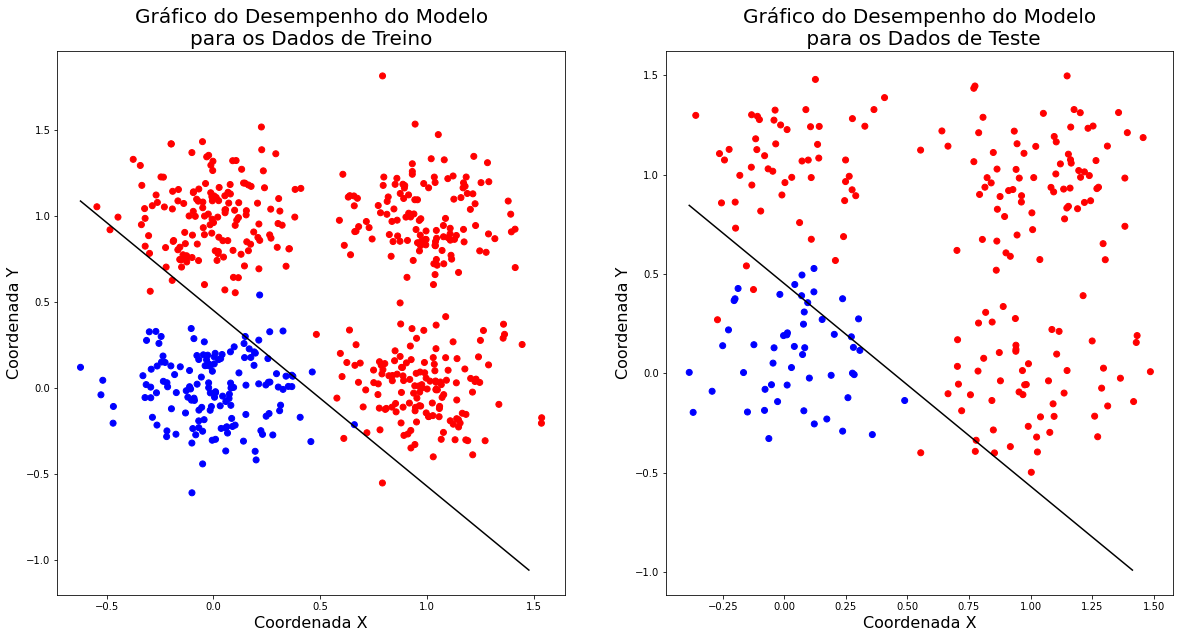

In [43]:
plt.rcParams['figure.figsize'] = (20, 10)
# Cálculo dos coeficientes da linha de decisão
a, b = perceptron3.pesos[0] / perceptron3.pesos[2], (-1) * (perceptron3.pesos[1] / perceptron3.pesos[2])

cores_treino = criar_cores(Y_treino)

# Criando os pontos da linha de decisão para treino
x, y = [], []
menor, maior = min(X_treino[:,1]), max(X_treino[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b * (i)
    y.append(valor)

# Criação do gráfico para treino    
plt.subplot(1, 2, 1)
plt.title("Gráfico do Desempenho do Modelo\npara os Dados de Treino", size=20)
plt.xlabel("Coordenada X", size=16)
plt.ylabel("Coordenada Y", size=16)

plt.plot(x, y, color="black", markersize=100)
plt.scatter(X_treino[:,1], X_treino[:,2], marker='o', color=cores_treino)

cores_teste = criar_cores(Y_teste)

# Criando os pontos da linha de decisão para teste
x, y = [], []
menor, maior = min(X_teste[:,1]), max(X_teste[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b * (i)
    y.append(valor)

# Criação do gráfico para teste
plt.subplot(1, 2, 2)
plt.title("Gráfico do Desempenho do Modelo\n para os Dados de Teste", size=20)
plt.xlabel("Coordenada X", size=16)
plt.ylabel("Coordenada Y", size=16)
plt.plot(x, y, color="black", markersize=100)
plt.scatter(X_teste[:,1], X_teste[:,2], marker='o', color=cores_teste)

plt.show()

**Assim, como mencionado anteriormente, é evidente a característica não linear do problema abordado, evidenciado pela não convergência do neurôrio durante seu treinamento, tal como a incapacidade de separação dos dados por apenas uma reta, obtida com o neurônio perceptron. Desta forma, evidencia-se também a necessiade de uma função mais complexa, de forma a implementar uma superfície de separação adequada ao problema apresentado.**  